In [823]:
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import norm

In [765]:
d=1
E=1/3
U=E+math.sqrt(2)/2*math.log(2/d)
print(U)

0.8234624050676069


In [824]:
def generate_gaussian(mean, cov, num_samples):
    """
    Generate multi-dimensional Gaussian random variables.

    Parameters:
        mean (list or np.array): Mean vector of the Gaussian distribution.
        cov (list or np.array): Covariance matrix of the Gaussian distribution.
        num_samples (int): Number of samples to generate.

    Returns:
        np.array: Generated samples of shape (num_samples, dimension).
    """
    mean = np.array(mean)
    cov = np.array(cov)

    if mean.ndim != 1 or cov.ndim != 2 or cov.shape[0] != cov.shape[1] or len(mean) != cov.shape[0]:
        raise ValueError("Mean vector and covariance matrix dimensions must align.")

    samples = np.random.multivariate_normal(mean, cov, num_samples)
    return samples

def generate_random_covariance(dim):
    """
    Generate a random positive semi-definite covariance matrix of given dimension.

    Parameters:
        dim (int): Dimension of the covariance matrix.

    Returns:
        np.array: A dim x dim covariance matrix.
    """
    A = np.random.rand(dim, dim)
    cov = np.dot(A, A.T)  # Create a symmetric positive semi-definite matrix
    return cov

def generate_combinations(numbers, r):
    """
    Generate all combinations of a given size from a list of numbers.

    Parameters:
        numbers (list): List of numbers to generate combinations from.
        r (int): Size of each combination.

    Returns:
        list: List of combinations, each as a tuple.
    """
    return list(combinations(numbers, r))

In [825]:
cov=generate_random_covariance(M)
cov=np.diag(cov)
np.diag(np.diag(x))

NameError: name 'x' is not defined

In [826]:
def meanvsmedian(a,name):
    # Define probabilities
    probabilities = [0.7-a, a, 0.3]  # Probabilities for [1, 0.9, 0]
    values = [1, 0.9, 0]  # Corresponding values
    # Generate 1000 samples
    samples = np.random.choice(values, size=1000, p=probabilities)
    if name=='median':
        return np.median(samples)
    else:
        return np.mean(samples)
    # print("Median of the samples:", np.median(samples))
    # print("Mean of the samples:", np.mean(samples))

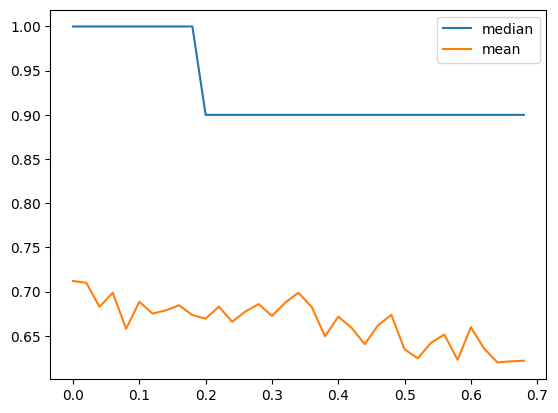

In [ ]:
x=np.arange(0,0.7,0.02)
plt.plot(x,[meanvsmedian(i,'median') for i in x],label='median')
plt.plot(x,[meanvsmedian(i,'mean') for i in x],label='mean')
plt.legend()

In [1257]:
class suboptimality:
    def __init__(self,M,K,delta=0.01):
        self.M = M
        self.K = K
    # def generate_samples(self): 
        # self.mean = np.sort(np.random.rand(M))[::-1]
        # cov=generate_random_covariance(self.M)
        # self.cov=np.diag(np.diag(cov))
        variances = np.random.uniform(0.01, 10, M)
        sorted_variances = np.sort(variances)[::-1]
        self.mean = np.sort(np.random.rand(M))[::-1] #np.random.rand(M) #np.array([0]*M)
        self.cov = np.diag(variances) #np.eye(M)*10  #
        self.delta=delta
        num_samples = 10000
        # Generate samples
        self.samples = generate_gaussian(self.mean, self.cov, num_samples) #np.cov(samples.T)

    def iterative_elimination(self):
        A=[*range(self.M)]
        while len(A)>self.K:
            A,minexp=self.Aminus_enumeration(A)
        return A, minexp
    
    def iterative_addition(self):
        A=[] #[*range(self.M)]
        while len(A)<self.K:
            A,minexp=self.Aplus_enumeration(A)
        return A, minexp

    def Aminus_enumeration(self,A):
        comb=generate_combinations(A, len(A)-1)
        minexp=100
        optAminus=[]
        for c in comb:
            Aminus=list(c)
            exp=np.average(np.max(self.samples,1)-np.max(self.samples[:,Aminus],1))
            if minexp > exp:
                minexp = exp
                optAminus = Aminus   
        return optAminus, minexp
    
    def Aplus_enumeration(self,A):
        notA=[i for i in range(self.M) if i not in A]
        comb=[A+[i] for i in notA] #generate_combinations(notA, len(A)-1)
        minexp=100
        optAminus=[]
        for c in comb:
            Aminus=list(c)
            exp=np.average(np.max(self.samples,1)-np.max(self.samples[:,Aminus],1))
            if minexp > exp:
                minexp = exp
                optAminus = Aminus   
        return optAminus, minexp

    def enumeration(self,numbers=[]):
        # Generate combinations
        if len(numbers)==0:
            numbers = [*range(self.M)]
        comb = generate_combinations(numbers, self.K)
        minexp=100
        optA=[]
        for c in comb:
            A=list(c)
            exp=np.average(np.max(self.samples,1)-np.max(self.samples[:,A],1))
            if minexp > exp:
                minexp = exp
                optA = A
        return optA, minexp, np.quantile(np.max(self.samples,1)-np.max(self.samples[:,optA],1), 1-self.delta)
   
    def enumeration_multiple(self,numbers=[]):
        # Generate combinations
        if len(numbers)==0:
            numbers = [*range(self.M)]
        comb = generate_combinations(numbers, self.K)
        minexp=100
        optA=[]
        for c in comb:
            A=list(c)
            exp=np.average(np.max(self.samples,1)-np.max(self.samples[:,A],1))
            if minexp > exp:
                minexp = exp
                optA = A
        return optA, minexp
    
    def bounds(self,alpha,A=[]):
        if len(A)==0:
            A=[*range(self.M)]
        bounds=[norm.ppf(alpha, loc=self.mean[i], scale=math.sqrt(self.cov[i,i])) for i in A]
        # median=self.mean # mean=median for gaussian
        return np.array(bounds)
    
    def bound_enumeration(self,numbers=[]):
        # Generate combinations
        if len(numbers)==0:
            numbers = [*range(self.M)]
        comb = generate_combinations(numbers, self.K)
        upperbounds=self.bounds(1-self.delta/2)
        median=np.array(self.mean)
        minexp=100
        optA=[]
        for c in comb:
            A=list(c)
            Ac=list(set(numbers)-set(A))
            exp=np.max(upperbounds[Ac])-np.min(median[A]) #
            if minexp > exp:
                minexp = exp
                optA = A
        return optA, self.DeltaA(optA), minexp
    
    def unionset(self):
        U=self.bounds(1-self.delta/2)
        rankU=np.array([sorted(U,reverse = True).index(x) for x in U])
        union=[]
        for i in range(self.M):
            if (i<self.K)|(rankU[i]<self.K):
                union+=[i]
        return union

    def DeltaA(self,A):
        return np.average(np.max(self.samples,1)-np.max(self.samples[:,A],1))
    
    def JA(self,A):
        numbers = [*range(self.M)]
        Ac=list(set(numbers)-set(A))
        upperbounds=self.bounds(1-self.delta/2,Ac)
        median=np.array(self.mean)[A]
        return np.max(upperbounds)-np.min(median)
        
    def plotdata(self,A):
        return np.max(self.samples,1)-np.max(self.samples[:,A],1)
        # plt.hist(,bins=10)

In [1248]:
M=12
K=4
delta=(1/2)**(K-1)
trial=suboptimality(M,K,delta)

In [1249]:
trial.enumeration()

([0, 1, 3, 4], 0.3979251728837474, 1.3147388222119156)

In [1250]:
trial.enumeration(trial.unionset())

([0, 1, 3, 4], 0.3979251728837474, 1.3147388222119156)

In [1244]:
trial.bound_enumeration(trial.unionset())

([1, 2, 8, 11, 12], 0.7759774185189406, 5.001107594711211)

In [1238]:
trial.unionset()

[0, 1, 2, 3, 4, 8, 11, 14]

In [1159]:
optA=trial.bound_enumeration()[0]
bourank=[sorted(trial.bounds(1-delta/2),reverse=True).index(x) for x in trial.bounds(1-delta/2)]
np.array(bourank)[optA]

array([4, 1, 3, 0, 2])

In [1267]:
bounds=trial.bounds(1-delta/2)

In [1261]:
for ignore in range(1000):
    trial=suboptimality(M,K,delta)
    x1,y1,_=trial.bound_enumeration()
    # x2,y2,z2=trial.enumeration(trial.unionset())
    if set(x1).issubset(trial.unionset())==False:
        print(trial.unionset(),x1)

In [ ]:
numbers = union #[*range(M)]
comb = generate_combinations(numbers, K)
y1=[]
y2=[]
for c in comb:
    A=list(c)
    y1.append(trial.DeltaA(A))
    y2.append(trial.JA(A))

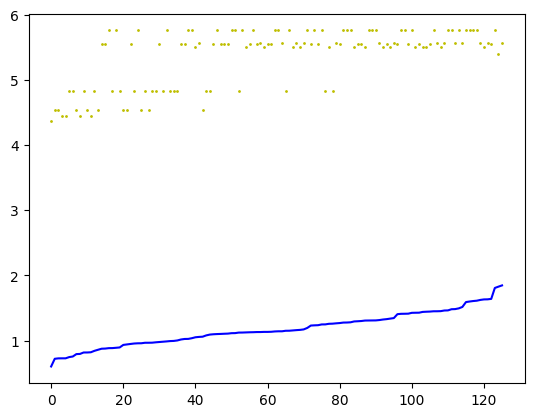

In [1165]:
plt.plot([x for x, _ in sorted(zip(y1, y2))],color='b')
plt.scatter([*range(len(comb))],[x for _, x in sorted(zip(y1, y2))],color='y',s=1)

In [ ]:
trial.DeltaA([i for i in range(M) if sorted(bounds,reverse=True).index(bounds[i])<K])

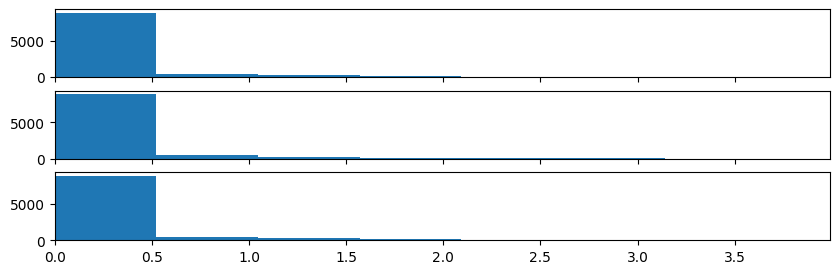

In [1311]:
trial=suboptimality(M,K,delta)
bounds=trial.bounds(1-delta/2)
f,ax=plt.subplots(3,figsize=(10,3),sharex=True)
ax[0].hist(trial.plotdata(trial.enumeration()[0]))
A,i,c=trial.bound_enumeration()
ax[1].hist(trial.plotdata(A))
ax[2].hist(trial.plotdata([i for i in range(M) if sorted(bounds,reverse=True).index(bounds[i])<K]))
ax[0].set_xlim([0,c])
# ax[1].set_xlim([0,c])
plt.show()

In [ ]:
K=7
(1/2)**(K-1)

0.015625

In [1283]:
M=12
K=6
delta=(1/2)**(K-1)
e=20
dataa=[]
datab=[]
datac=[]
datad=[]
for ignore in range(e):
    trial=suboptimality(M,K,delta)
    bounds=trial.bounds(1-delta/2)
    # dataa.append(trial.enumeration()[1])
    a=trial.enumeration()[1]
    datab.append((trial.bound_enumeration()[1]-a)/a)
    datac.append((trial.DeltaA([*range(K)])-a)/a)
    datad.append((trial.DeltaA([i for i in range(M) if sorted(bounds,reverse=True).index(bounds[i])<K])-a)/a)

([<matplotlib.axis.YTick at 0x22130288220>,
 [Text(0, 0.0, '0.0000'),
  Text(0, 0.05532062614705273, '0.0553'),
  Text(0, 0.4192569878251211, '0.4193')])

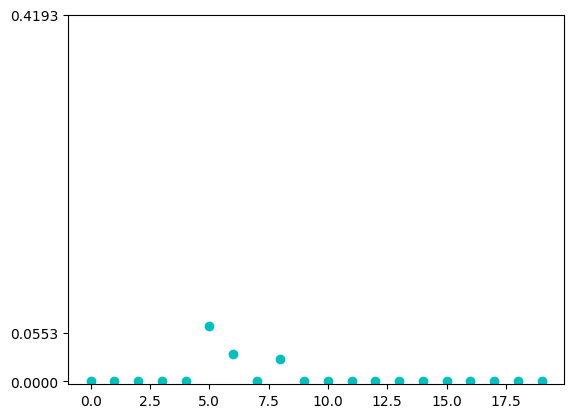

In [1287]:
# plt.scatter([*range(e)],dataa,c='r')
# plt.scatter([*range(e)],datab,c='g')
plt.scatter([*range(e)],datad,c='c')
# plt.scatter([*range(e)],datac,c='b')
plt.yticks([0,np.average(datab),np.max(datab)])

In [ ]:
M=10
K=3
exp_eliminate=[]
exp_add=[]
exp_enumerate=[]
diff=0
for ignore in range(50):
    trial=suboptimality(M,K)
    # result0=trial.iterative_elimination()
    # result1=trial.iterative_addition()
    result2=trial.enumeration()
    # if result0[0] != result1[0]:
    #     break
    #     diff+=1
    # exp_eliminate += [result0[1]]
    # exp_add += [result1[1]]
    exp_enumerate += [result2[1]]

In [ ]:
np.cov()

TypeError: cov() missing 1 required positional argument: 'm'

In [ ]:
trial=suboptimality(M,K)
trial.enumeration()

([0, 1, 2], 0.2808817104156382)

In [ ]:
np.diag(np.cov(trial.samples.T))

array([1.35191728, 1.23010076, 1.1112896 , 0.72546197, 1.06324628])

In [ ]:
np.diag(trial.cov)

array([0.92890299, 1.96330719, 2.05349669, 2.01478776, 0.79720796])

In [ ]:
# trial=suboptimality(M,K)
trial.iterative_elimination()

([0, 7, 10, 13, 15], 1.3446300225404533)

In [ ]:
np.mean(exp_eliminate)

1.3412085776414653

In [ ]:
np.mean(exp_enumerate)

1.3402331439590685

In [ ]:
(np.mean(exp_eliminate)-np.mean(exp_enumerate))/np.mean(exp_enumerate)

0.002030473713528727

In [ ]:
np.max([exp_eliminate[i]-exp_enumerate[i] for i in range(50)])

0.010597334245793122

Text(0.5, 1.0, 'Expectation of sub-optimality gap | independent actions | different mean over prior')

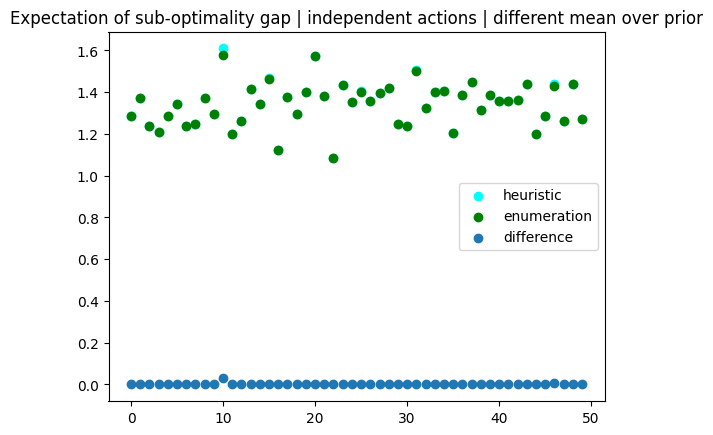

In [ ]:
t=len(exp_enumerate)
plt.scatter([*range(t)],exp_eliminate,color='cyan',label='heuristic')
# plt.scatter([*range(t)],exp_add,color='b')
plt.scatter([*range(t)],exp_enumerate,color='green',label='enumeration')
plt.scatter([*range(t)],[exp_eliminate[i]-exp_enumerate[i] for i in range(t)],label='difference')
plt.legend()
plt.title('Expectation of sub-optimality gap | independent actions | different mean over prior')

Text(0.5, 1.0, 'Expectation of sub-optimality gap | dependent actions | different mean over prior')

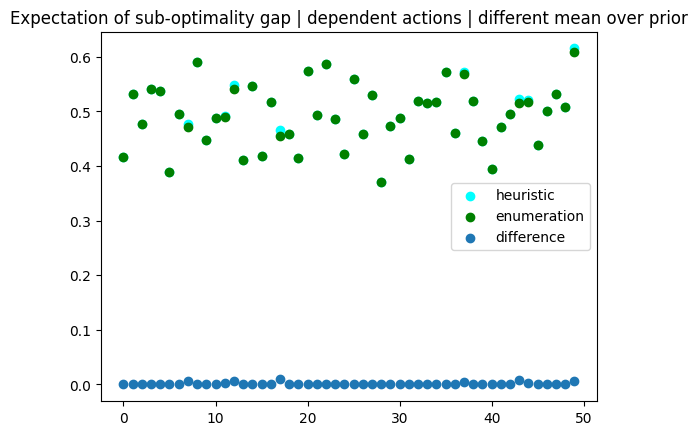

In [ ]:
t=len(exp_enumerate)
plt.scatter([*range(t)],exp_eliminate,color='cyan',label='heuristic')
# plt.scatter([*range(t)],exp_add,color='b')
plt.scatter([*range(t)],exp_enumerate,color='green',label='enumeration')
plt.scatter([*range(t)],[exp_eliminate[i]-exp_enumerate[i] for i in range(t)],label='difference')
plt.legend()
plt.title('Expectation of sub-optimality gap | dependent actions | different mean over prior')

Text(0.5, 1.0, 'Expectation of sub-optimality gap | dependent actions')

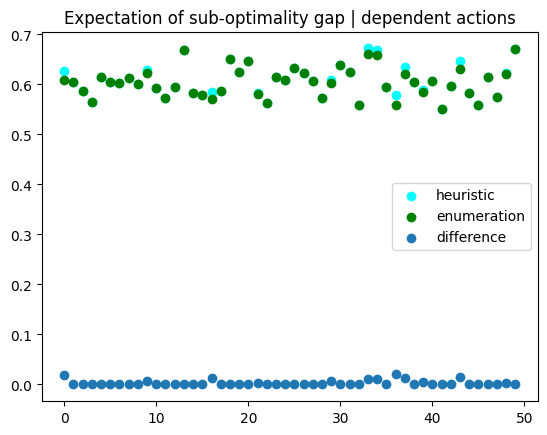

In [ ]:
t=len(exp_enumerate)
plt.scatter([*range(t)],exp_eliminate,color='cyan',label='heuristic')
# plt.scatter([*range(t)],exp_add,color='b')
plt.scatter([*range(t)],exp_enumerate,color='green',label='enumeration')
plt.scatter([*range(t)],[exp_eliminate[i]-exp_enumerate[i] for i in range(t)],label='difference')
plt.legend()
plt.title('Expectation of sub-optimality gap | dependent actions')

Text(0.5, 1.0, 'Expectation of sub-optimality gap | independent actions')

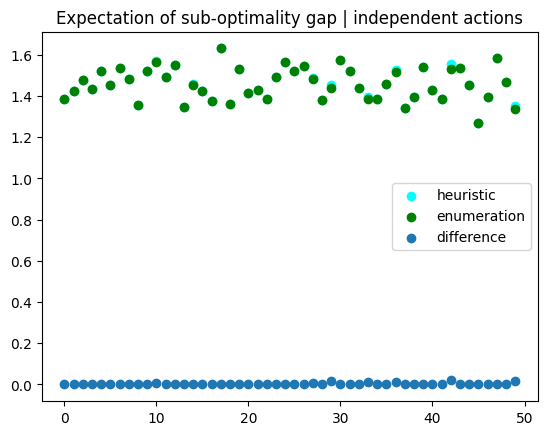

In [ ]:
t=len(exp_enumerate)
plt.scatter([*range(t)],exp_eliminate,color='cyan',label='heuristic')
# plt.scatter([*range(t)],exp_add,color='b')
plt.scatter([*range(t)],exp_enumerate,color='green',label='enumeration')
plt.scatter([*range(t)],[exp_eliminate[i]-exp_enumerate[i] for i in range(t)],label='difference')
plt.legend()
plt.title('Expectation of sub-optimality gap | independent actions')

In [ ]:
trial.enumeration()

([1, 3, 5, 7, 8], 0.19981672153166596)

In [ ]:
# Mean vector and covariance matrix

mean = [0]*M
cov=generate_random_covariance(M)
# cov=np.eye(M)
num_samples = 1000
# Generate samples
samples = generate_gaussian(mean, cov, num_samples) #np.cov(samples.T)

In [ ]:
A=[*range(M)]
while len(A)>K:
    A,minexp=Aminus_enumeration(samples,A)
print(A,minexp)

[0, 1, 4] 0.10142462284716339


In [ ]:
enumeration(samples)

([0, 1, 4], 0.10142462284716339)

In [ ]:
A=[2,0]
np.average(np.max(samples,1)-np.max(samples[:,A],1))

0.5183915607103443

In [ ]:
A=[1,0]
np.average(np.max(samples,1)-np.max(samples[:,A],1))

0.2005434133506281

In [ ]:
A=[1,2]
np.average(np.max(samples,1)-np.max(samples[:,A],1))

0.23886165038309223

In [ ]:
A=[2,3]
np.average(np.max(samples,1)-np.max(samples[:,A],1))

0.8219816244864687

In [ ]:
data

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 1, 1]])

In [ ]:
data = np.array([[1,0,0],[0,1,0],[0,0,1],[1,1,1]])
np.cov(data)

array([[ 0.33333333, -0.16666667, -0.16666667,  0.        ],
       [-0.16666667,  0.33333333, -0.16666667,  0.        ],
       [-0.16666667, -0.16666667,  0.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [ ]:

B=[i for i in range(M) if i not in A]